In [24]:
# Python program to print all heading tags
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment
import re

# scrape a URL
url_link = 'https://nypost.com/'
request = requests.get(url_link)
regex = re.compile('[^a-zA-Z]')

Soup = BeautifulSoup(request.text, 'lxml')
tag_words =[]
regData =[]
# creating a list of all common heading tags
heading_tags = ["h2"]
for tags in Soup.find_all(heading_tags):
    tag_words.append(tags.text.strip())
    list2 = [x.replace('\n', ' ') for x in tag_words]
    
list2

regex = re.compile('[^a-zA-Z]')
cleanData = []
for i in list2:
    cleanData.append(regex.sub(' ', i))
cleanData


['Our Scholars Contest for High School students in the New York area is open  Enter Now',
 'Try the e edition   paper format  online ease     days free with code NYPOST',
 'Self care essentials for the new year  Shop Now',
 'Idaho murders roommate came face to face with black clad killer on night of attacks  cops',
 'Harry s royal grumble',
 'Queen of hearts Queen s opinion of tequila loving Chelsy Davy played role in Harry split',
 'Dad joke King Charles made  sadistic  jokes about Prince Harry s  real  dad  memoir',
 'Harry admits he lied  actually did cocaine as a teenager',
 ' ShutUpHarry trends as Prince Harry s book  Spare  leaks   Pathetic ',
 'Unlucky in love Emily Ratajkowski revelation after Davidson fling   I attract the worst men ',
 'Idaho murder arrest',
 'Cops  treasure DNA from trash at Idaho murders suspect s family home in Pennsylvania linked him to crime',
 'FBI asked police to pull over accused Idaho butcher to get images of hands  report',
 'Accused killer s sis st

In [17]:
textblob_sentiment=[]
for s in cleanData:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [18]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [19]:
df_textblob

,Sentence,Polarity,Subjectivity
0,WATCH Suspect in Idaho slayings makes his firs...,0.25,0.333333
1,Frustration mounts as House speaker vote drags on,0.00,0.000000
2,Will Cain The Republican Party is the party o...,0.00,0.000000
3,House speaker is the worst job in America I ...,-0.10,0.950000
4,Fairfax County mom speaks out after son s meri...,0.00,0.000000
...,...,...,...
199,Germany working on legislation to enable use o...,0.00,0.000000
200,Oil spill in CA creek originated from well dug...,0.00,0.000000
201,sentenced in Chicago mom s gang related sh...,0.00,0.400000
202,Virginia delegate found not guilty of assaulti...,0.25,1.000000


In [20]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      204 non-null    object 
 1   Polarity      204 non-null    float64
 2   Subjectivity  204 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.9+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

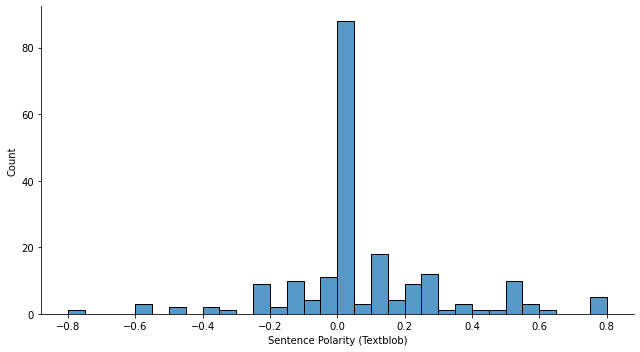

In [21]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

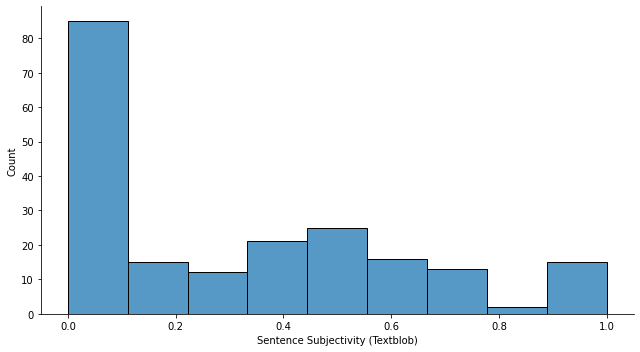

In [22]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [79]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('w+')

In [80]:
tokens = tokenizer.tokenize(list2)

TypeError: expected string or bytes-like object

In [81]:
#we are using request package to make a GET request for the website, which means we're getting data from it.
r=requests.get('https://www.foxnews.com/politics/zelensky-makes-direct-appeal-gop-critics-arguing-no-country-is-safe-if-ukraine-falters')
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'
#Extracting the HTML from the request object
html = r.text
# Printing the first 500 characters in html
# print(html[:500])
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()
textSlice = text[1895:6085]
#total length
len(text)
#having a look at the text

print(text[1895:6085])

December 21, 2022 8:41pm EST Zelenskyy makes direct appeal to GOP critics, arguing no country is safe if Ukraine falters Zelenskyy urged Congress to keep supporting Ukraine   
        By
        Haris Alic   | Fox News  Facebook Twitter Flipboard Comments Print Email  close      Video GOP appears split over continuing to provide aid to Ukraine Senior congressional correspondent Chad Pergram joins "Your World" to report on Ukraine President Volodymyr Zelenskyy's address to members of Congress on Wednesday night.Ukrainian President Volodymyr Zelenskyy made a direct appeal to Republican critics during his Wednesday address to a joint meeting of Congress, telling lawmakers that no country was safe in the face of Russian aggression.In a speech that won several standing ovations from both sides of the aisle, Zelenskyy predicted the war will hit a turning point next year just as Republicans are set to take control of the U.S. House of Representatives."The struggle will define in what world ou

In [82]:
words = textSlice.split(" ")
words[-1] = words[-1].strip(".\n")
words
# sentence=[]
# tokens = nlp(clean_text)
# for sent in tokens.sents:
#     sentence.append((sent.text.strip()))
# sentence


['December',
 '21,',
 '2022',
 '8:41pm',
 'EST',
 'Zelenskyy',
 'makes',
 'direct',
 'appeal',
 'to',
 'GOP',
 'critics,',
 'arguing',
 'no',
 'country',
 'is',
 'safe',
 'if',
 'Ukraine',
 'falters',
 'Zelenskyy',
 'urged',
 'Congress',
 'to',
 'keep',
 'supporting',
 'Ukraine',
 '',
 '',
 '\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'By\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Haris',
 'Alic',
 '',
 '',
 '|',
 'Fox',
 'News',
 '',
 'Facebook',
 'Twitter',
 'Flipboard',
 'Comments',
 'Print',
 'Email',
 '',
 'close',
 '',
 '',
 '',
 '',
 '',
 'Video',
 'GOP',
 'appears',
 'split',
 'over',
 'continuing',
 'to',
 'provide',
 'aid',
 'to',
 'Ukraine',
 'Senior',
 'congressional',
 'correspondent',
 'Chad',
 'Pergram',
 'joins',
 '"Your',
 'World"',
 'to',
 'report',
 'on',
 'Ukraine',
 'President',
 'Volodymyr',
 "Zelenskyy's",
 'address',
 'to',
 'members',
 'of',
 'Congress',
 'on',
 'Wednesday',
 'night.Ukrainian',
 'President',
 'Volodymyr',
 'Zelenskyy',
 'made',
 'a',
 'direct',
 'ap

In [83]:
#Now we have to remove stopwords
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
#In NLP and text mining applications, stop words are used to eliminate unimportant words, 
#allowing applications to focus on the important words instead.
#English stop words from nltk
wordsLst = []
# Looping through the tokens and make them lower case
for word in words:
    wordsLst.append(word.lower())
wordsLst

words_new=[]
stopwords = nltk.corpus.stopwords.words('english')
#Appending to words_new all words that are in words but not in sw
for word in wordsLst:
    if word not in stopwords:
        words_new.append(word)

In [84]:
from collections import Counter
my_counter = Counter(cleanData)
print(my_counter)

NameError: name 'cleanData' is not defined

In [85]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

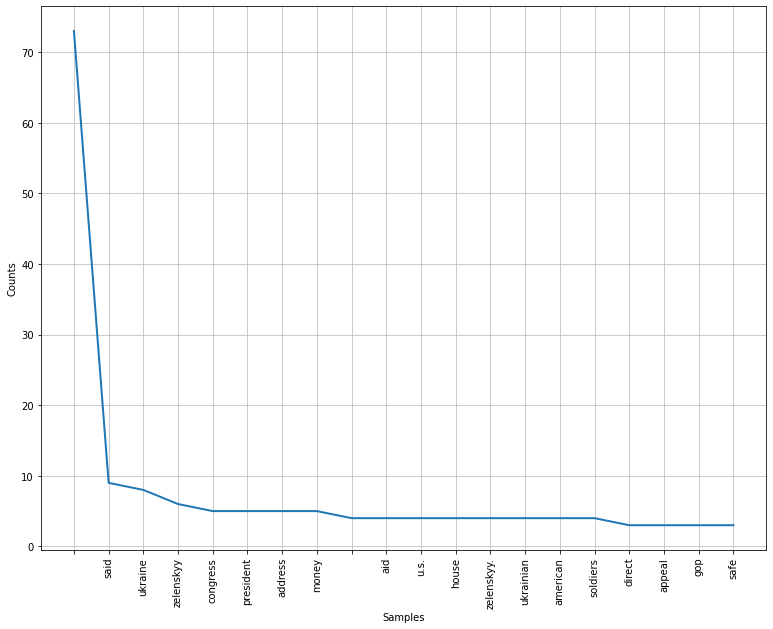

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [86]:
#Frequency Distribution Plot
plt.subplots(figsize=(13,10))
freq_dist.plot(20)

In [ ]:
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
stem_tokens = []
for t in cleanData:
    lemma = ls.lemmatize(t) 
    stem_tokens.append(lemma)

In [ ]:
from collections import Counter
my_counter = Counter(stem_tokens)
print(my_counter)

In [ ]:
plotfreq(stem_tokens)

In [ ]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

In [ ]:
clean_text= stem_tokens.replace("n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [ ]:
sentence=[]
tokens = nlp(stem_tokens)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [ ]:
# Import the Naive Bayes Classification algorithm
from nltk.classify import NaiveBayesClassifier

# Import the subjectivity test corpus
from nltk.corpus import subjectivity

# Import the sentiment analysis libraries
from nltk.sentiment import SentimentAnalyzer

# Import the utilities library
from nltk.sentiment.util import *

from nltk.sentiment import SentimentAnalyzer

sentim_anl = SentimentAnalyzer()
all_words = sentim_anl.all_words([mark_negation(doc) for doc in stem_tokens])
all_words

In [ ]:
len(all_words)